In [ ]:
# ===> Data cleaning 
# ===> Dummy variable creation 
# ===> Normalization/Standadization 
# ===> Test & Train split
# ===> Build the model with RFE then with manual elimination 
# ===> Finetune the mode with VIF and P-Value
# ===> Validating the model 
# ===> Check if residuals are nomally distributed around Zero by plotting 
# ===> Use the training model to predict and check different models to check 

In [758]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [759]:
car_prices = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/a9f2334f-9eb2-4160-8486-701584204e08/CarPrice_Assignment.csv')
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [760]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [761]:
# ===> Fetch unique columns in each columns
# ===> So those variables can be categorical 
car_prices.describe(include='all').loc['unique', :]

car_ID              NaN
symboling           NaN
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase           NaN
carlength           NaN
carwidth            NaN
carheight           NaN
curbweight          NaN
enginetype            7
cylindernumber        7
enginesize          NaN
fuelsystem            8
boreratio           NaN
stroke              NaN
compressionratio    NaN
horsepower          NaN
peakrpm             NaN
citympg             NaN
highwaympg          NaN
price               NaN
Name: unique, dtype: object

 **====> Categorical variables try to understand and which we can make dummy variables**

In [762]:
car_prices.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [763]:
car_prices.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [764]:
car_prices.doornumber.unique()

array(['two', 'four'], dtype=object)

In [765]:
car_prices.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [766]:
car_prices.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [767]:
car_prices.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [768]:
# ====> Skipping car model it's not independent variable as mentioned in the problem statement.
tmp = car_prices.CarName.str.split(" ", 1, expand=True)
car_prices['CompanyName'] = tmp[0]
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [769]:
car_prices.drop(columns='CarName', inplace=True, axis=1)

In [770]:
car_prices.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

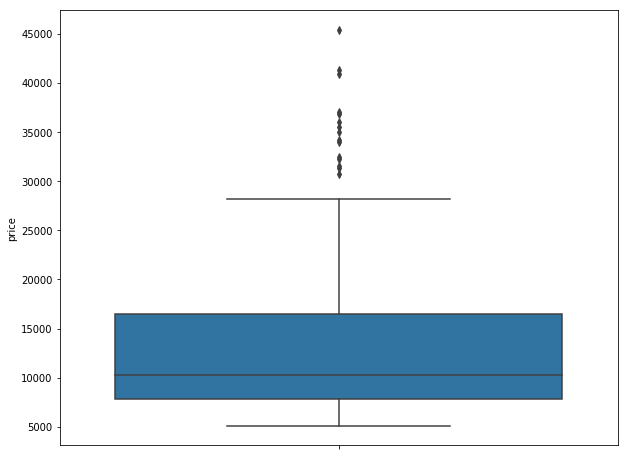

In [771]:
plt.figure(figsize=(10,8))
sns.boxplot(car_prices.price, orient='v')
plt.show()

In [772]:
# ====> Try to remove outliers
# def remove_price_outliers(items, _column):
#     return items[items[_column] < items[_column].quantile(0.75) ]

# car_prices = remove_price_outliers(car_prices, 'price')
# car_prices.shape

In [773]:
car_prices.shape

(205, 26)

In [774]:
# ====> check for duplicated rows
car_prices[car_prices.duplicated()]
# ====> There are no duplicated columns

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


### Data Cleaning & Preparation:

In [775]:
# ====> remove columns car_ID which is not required.
car_prices.drop(columns=['car_ID'], inplace=True)

In [776]:
# ====> doornumber set the integer
def map_doornumber(x):
    return x.map({'two': 2, 'four': 4})
car_prices[['doornumber']] = car_prices[['doornumber']].apply(map_doornumber)

In [777]:
# ===> List all the dummy columns we wanto evaluate and then loop through for the concat of object

def set_dummy_columns(_data, _columns):
    for _column in _columns:
        _dummy_data = pd.get_dummies(_data[_column], drop_first=True)
        _data = pd.concat([_data, _dummy_data], axis=1)
        _data.drop(columns=[_column], inplace=True, axis=1)
    return _data

_columns = ['enginetype', 'enginelocation', 'drivewheel', 'carbody', 'aspiration', 'CompanyName', 'fueltype', 'fuelsystem']
car_prices =  set_dummy_columns(car_prices, _columns)
        

In [778]:
car_prices.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'rear', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'turbo',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw',
       'gas', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [779]:
car_prices.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [780]:
# ====> map cylindernumber to integers
def map_cylindernumber(x):
    return x.map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})
car_prices[['cylindernumber']] = car_prices[['cylindernumber']].apply(map_cylindernumber)

In [781]:
car_prices.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8])

### EDA

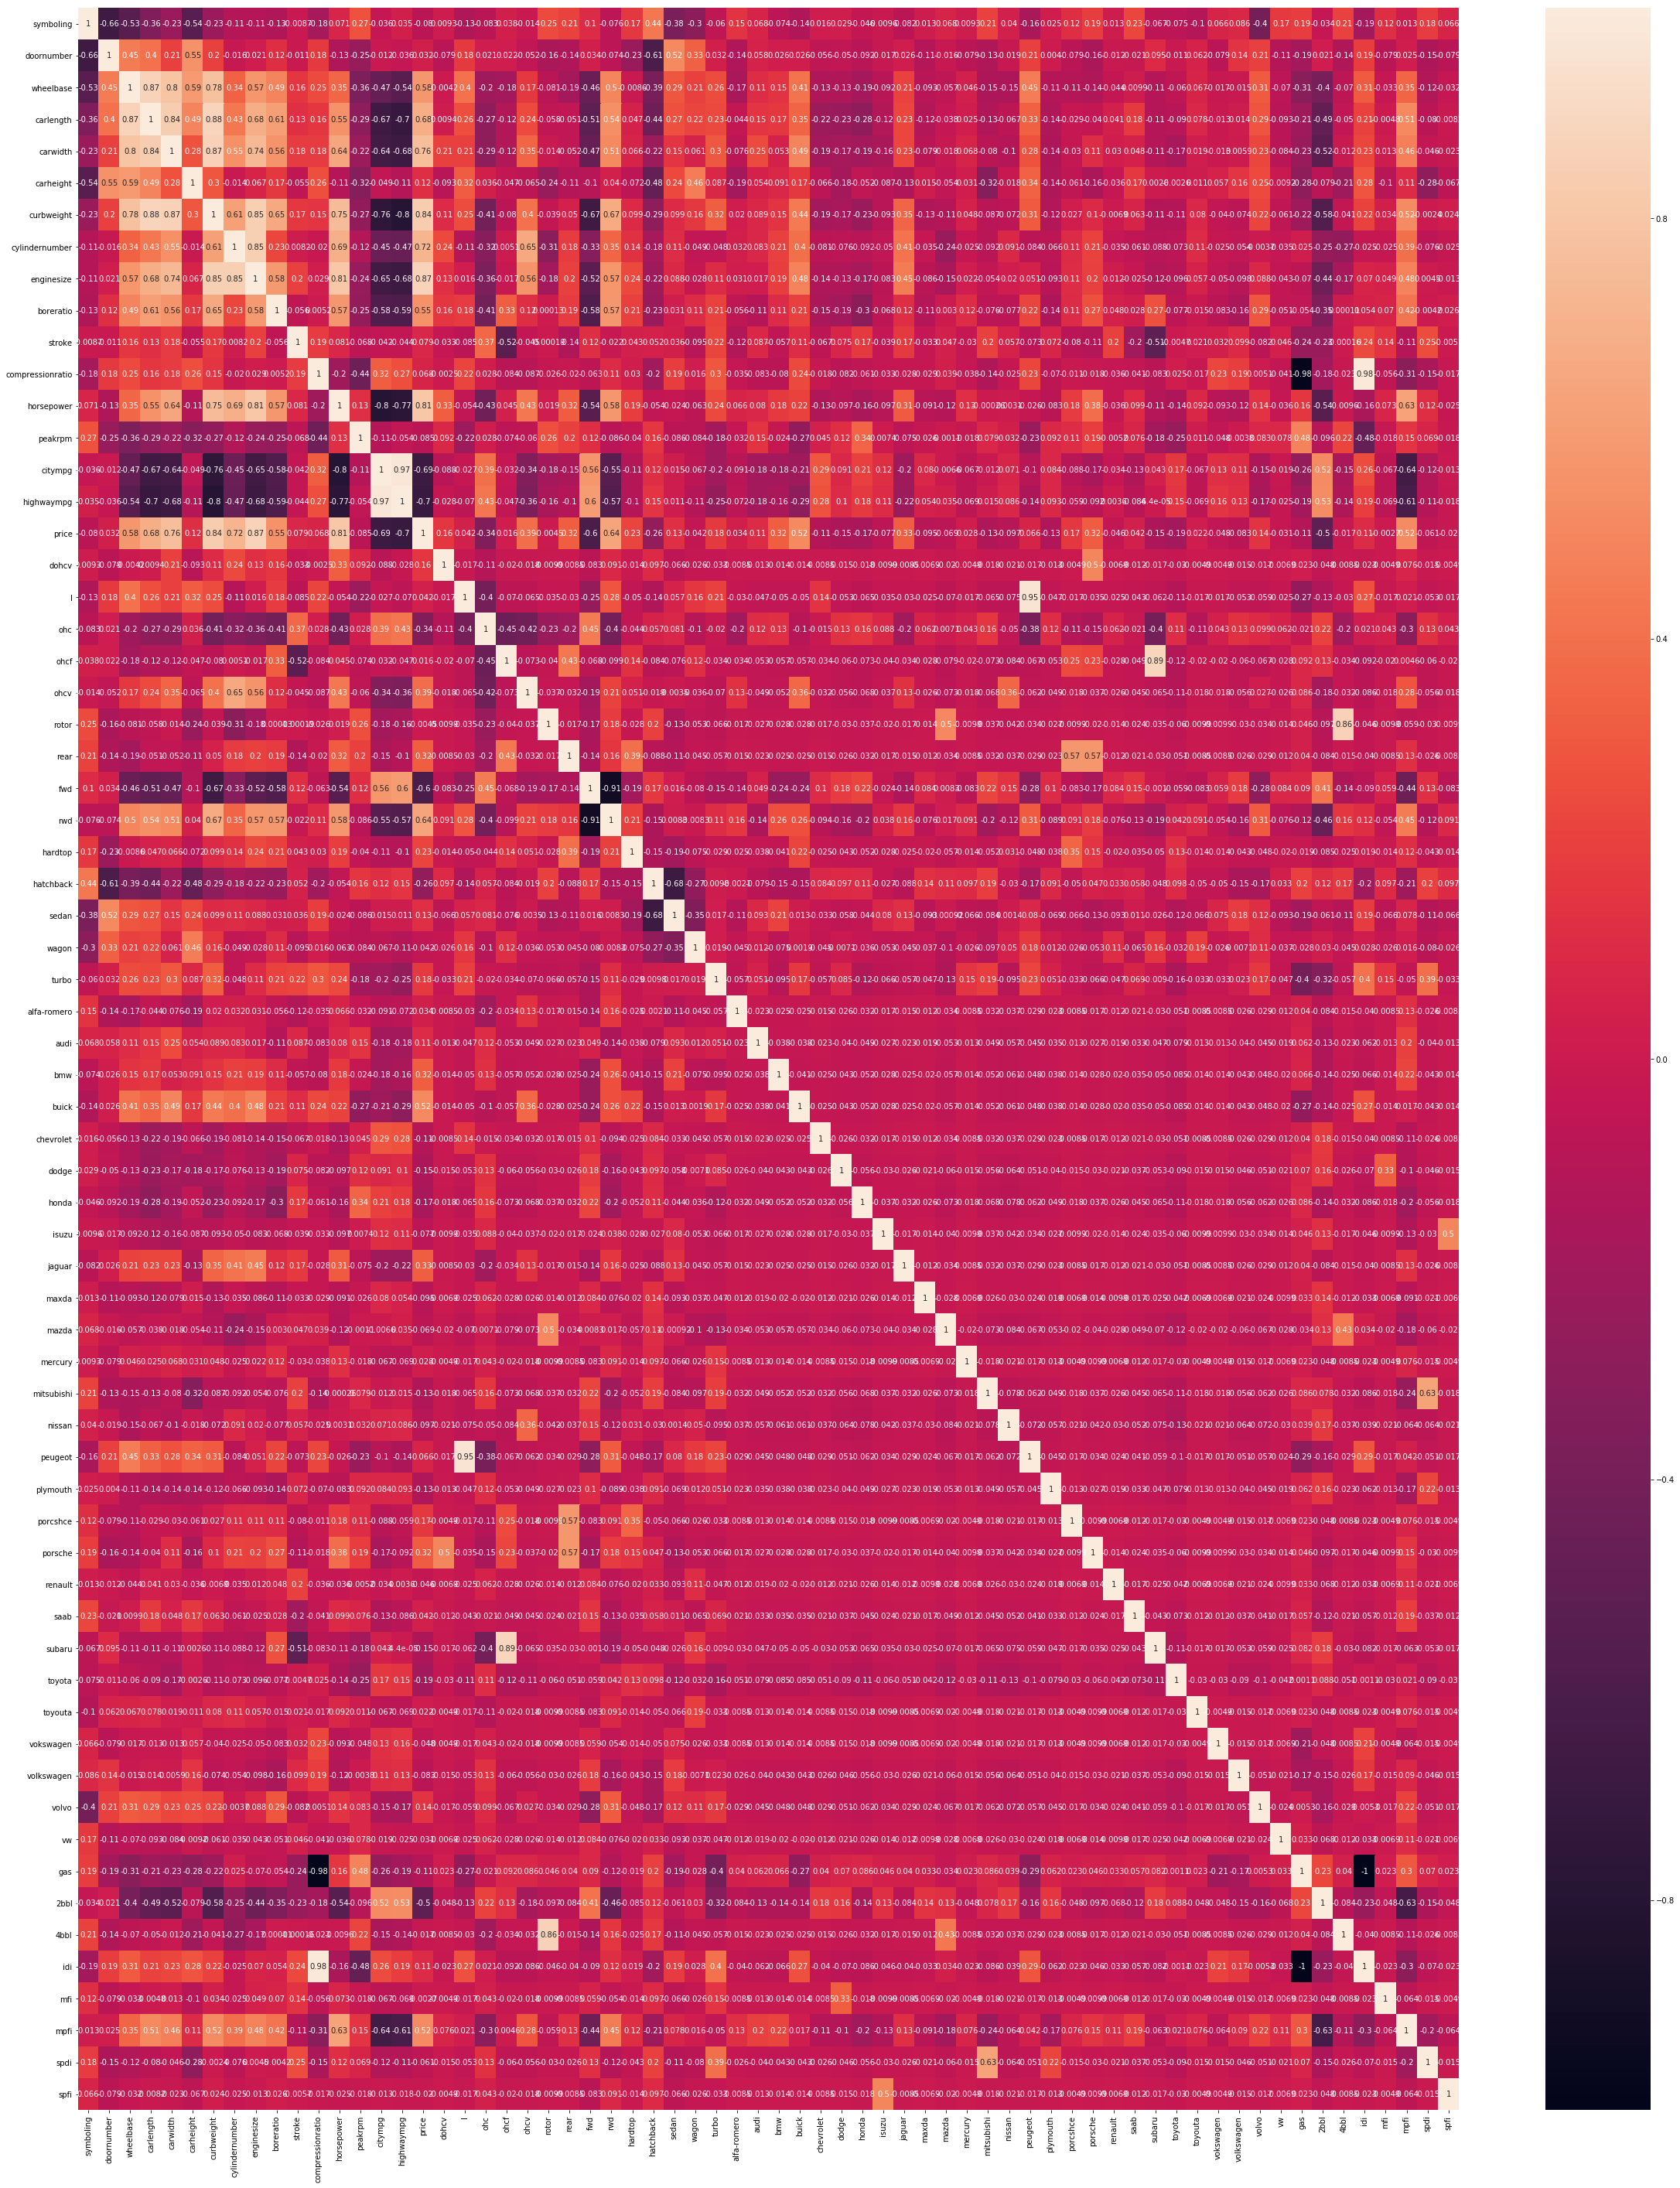

In [782]:
plt.figure(figsize=(40, 50))
sns.heatmap(car_prices.corr(), annot=True)
plt.show()

In [783]:
# plt.figure()
# _columns = ['']
# sns.pairplot(car_prices, diag_kind='kde')
# # plt.suptitle('Pair Plot for Car Pricing', size = 28)
# plt.show()

##### Major variables that are correlated with price as per the diagram
    1. wheelbase
    2. carlength
    3. carwidth
    4. curbweight
    5. cylindernumber
    6. enginersize
    7. boreration
    8. horsepower

In [784]:
car_prices.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'rear', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'turbo',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw',
       'gas', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


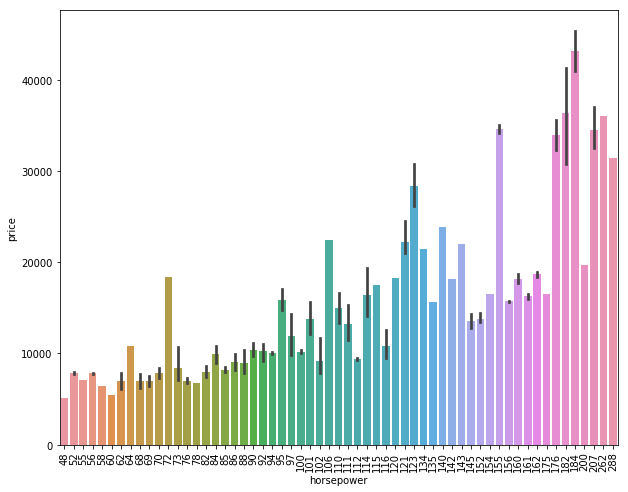

In [785]:
plt.figure(figsize=(10, 8))
sns.barplot(x=car_prices.horsepower, y=car_prices.price)
plt.xticks(rotation = '90')
plt.show()

**There is a significant correlation b/w price and engine horse power**

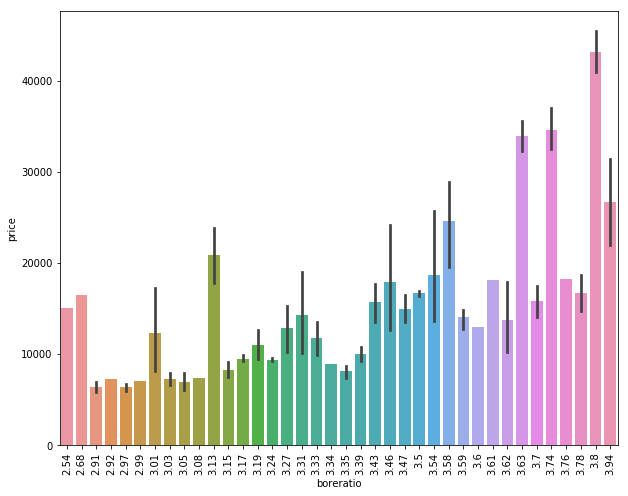

In [786]:
plt.figure(figsize=(10, 8))
sns.barplot(x=car_prices.boreratio, y=car_prices.price)
plt.xticks(rotation = '90')
plt.show()

**Bore ration has some linear dependency with the price**

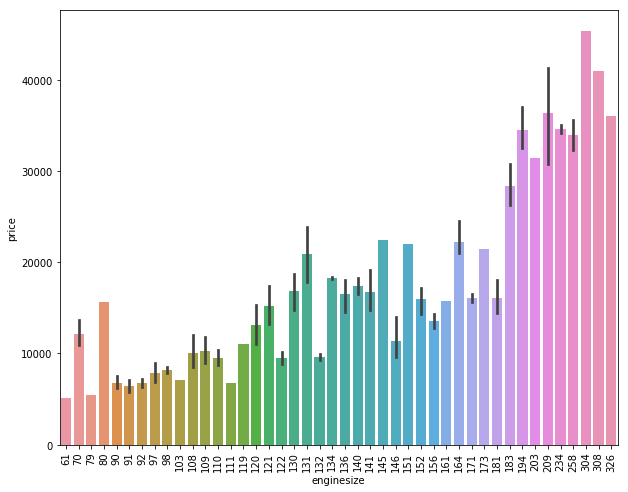

In [787]:
plt.figure(figsize=(10, 8))
sns.barplot(x=car_prices.enginesize, y=car_prices.price)
plt.xticks(rotation = '90')
plt.show()

In [788]:
car_prices.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,volvo,vw,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,...,0.053659,0.009756,0.902439,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,...,0.225894,0.098531,0.297446,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scalling the feature:

We have variables with wide range of values and to have same weightage with all of them we can do scaling. Another reason for scaling is with smaller values it will be faster to caluculate gradient descent. 

we have two types of scaling present:
1. MinMax Scaling
2. Standardisation scaling

In [789]:
from sklearn.preprocessing import MinMaxScaler

In [790]:
minmax_scaler = MinMaxScaler()

In [791]:
car_prices.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'rear', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'turbo',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw',
       'gas', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

#### Split  as train and test data:

In [792]:
car_prices_train, car_prices_test = train_test_split(car_prices, random_state=100, train_size=0.7, test_size=0.3)

In [793]:
car_prices_train.shape

(143, 66)

In [794]:
car_prices_test.shape

(62, 66)

In [795]:
_scaling_columns = ['symboling', 'doornumber', 'wheelbase', 'carlength', 
                    'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 
                    'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [796]:
car_prices_train[_scaling_columns] = minmax_scaler.fit_transform(car_prices_train[_scaling_columns])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [797]:
car_prices_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,volvo,vw,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.559441,0.411141,0.525476,65.839860,0.509004,0.407878,0.240559,0.241351,0.497946,...,0.041958,0.013986,0.909091,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.498199,0.205581,0.204848,2.214203,0.215378,0.211269,0.115818,0.154619,0.207140,...,0.201198,0.117845,0.288490,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,60.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.272414,0.399187,63.950000,0.353982,0.245539,0.200000,0.135849,0.305556,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,1.000000,0.341379,0.502439,65.400000,0.522124,0.355702,0.200000,0.184906,0.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,0.503448,0.669919,66.900000,0.668142,0.559542,0.200000,0.301887,0.682540,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,72.300000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [798]:
price_train_data = car_prices_train.pop('price')

In [799]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [800]:
linear_regression = LinearRegression()

In [852]:
car_prices_train.shape

(143, 65)

In [801]:
car_price_model1 = linear_regression.fit(car_prices_train, price_train_data)
rfe_price_model = RFE(car_price_model1, 20)
rfe_price_model = rfe_price_model.fit(car_prices_train, price_train_data)

In [802]:
list(zip(car_prices_train, rfe_price_model.support_, rfe_price_model.ranking_))

[('symboling', False, 30),
 ('doornumber', False, 34),
 ('wheelbase', True, 1),
 ('carlength', False, 23),
 ('carwidth', False, 24),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', False, 2),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 17),
 ('peakrpm', True, 1),
 ('citympg', False, 13),
 ('highwaympg', True, 1),
 ('dohcv', False, 4),
 ('l', True, 1),
 ('ohc', False, 6),
 ('ohcf', False, 5),
 ('ohcv', False, 41),
 ('rotor', True, 1),
 ('rear', True, 1),
 ('fwd', False, 32),
 ('rwd', False, 33),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 7),
 ('alfa-romero', False, 20),
 ('audi', False, 27),
 ('bmw', True, 1),
 ('buick', False, 9),
 ('chevrolet', False, 14),
 ('dodge', False, 12),
 ('honda', False, 15),
 ('isuzu', False, 36),
 ('jaguar', False, 39),
 ('maxda', False, 37),
 ('mazda', False, 25),
 ('mercury', False, 4

#### RFE top columns and use statsmodel for the R-Squared

In [803]:
_rfe_columns = car_prices_train.columns[rfe_price_model.support_]
_rfe_columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'highwaympg', 'l', 'rotor', 'rear',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'bmw', 'peugeot', 'porsche',
       'gas', 'idi'],
      dtype='object')

In [804]:
def build_new_stats_model(_columns):
    x_train_rfe = sm.add_constant(car_prices_train[_rfe_columns])
    car_prise_ls_model = sm.OLS(price_train_data, x_train_rfe).fit()
    print(car_prise_ls_model.summary())

In [805]:
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     96.13
Date:                Sat, 25 May 2019   Prob (F-statistic):           2.32e-64
Time:                        18:27:09   Log-Likelihood:                 214.51
No. Observations:                 143   AIC:                            -389.0
Df Residuals:                     123   BIC:                            -329.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1669      0.071  

In [806]:
def calculate_vfi(_columns, data):
    vif = pd.DataFrame()
    vif['Features'] = _columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by=['VIF'], ascending=False)
    print(vif)

In [807]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

            Features     VIF
18               gas  148.07
19               idi  113.44
5   compressionratio   70.63
1         curbweight   20.38
13             sedan   13.10
12         hatchback   11.39
16           peugeot   10.38
2         enginesize   10.12
8                  l    9.80
7         highwaympg    7.76
14             wagon    6.55
0          wheelbase    5.72
3          boreratio    2.56
11           hardtop    2.55
10              rear    2.25
17           porsche    2.17
9              rotor    2.06
6            peakrpm    2.01
4             stroke    1.98
15               bmw    1.19


**remove column "l" as it has high VFI value and P Value**

In [808]:
_rfe_columns = _rfe_columns.tolist()
_rfe_columns.remove('l')

In [809]:
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     99.23
Date:                Sat, 25 May 2019   Prob (F-statistic):           1.29e-64
Time:                        18:27:18   Log-Likelihood:                 212.48
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     124   BIC:                            -330.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1624      0.072  

In [810]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

            Features     VIF
17               gas  145.42
18               idi  113.44
5   compressionratio   69.98
1         curbweight   20.01
12             sedan   13.09
11         hatchback   11.39
2         enginesize   10.12
7         highwaympg    7.04
13             wagon    6.54
0          wheelbase    5.72
3          boreratio    2.56
10           hardtop    2.55
9               rear    2.24
16           porsche    2.17
8              rotor    2.04
6            peakrpm    2.01
4             stroke    1.96
15           peugeot    1.84
14               bmw    1.19


**Remove columns Gas as it has highest VIF**

In [811]:
_rfe_columns.remove('gas')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     99.23
Date:                Sat, 25 May 2019   Prob (F-statistic):           1.29e-64
Time:                        18:27:22   Log-Likelihood:                 212.48
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     124   BIC:                            -330.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0187      0.062  

In [812]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

            Features     VIF
5   compressionratio  109.68
17               idi   73.29
1         curbweight   71.57
2         enginesize   33.02
0          wheelbase   27.90
7         highwaympg   24.25
4             stroke   22.53
12             sedan   22.20
11         hatchback   14.99
3          boreratio   13.72
6            peakrpm    9.04
13             wagon    6.85
10           hardtop    2.54
9               rear    2.19
8              rotor    2.09
15           peugeot    1.94
16           porsche    1.94
14               bmw    1.23


**Remove compressionratio column as it has highest VFI**

In [813]:
_rfe_columns.remove('compressionratio')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     96.26
Date:                Sat, 25 May 2019   Prob (F-statistic):           3.08e-63
Time:                        18:27:23   Log-Likelihood:                 206.11
No. Observations:                 143   AIC:                            -376.2
Df Residuals:                     125   BIC:                            -322.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0665      0.063     -1.055      0.2

In [814]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features    VIF
1   curbweight  71.45
2   enginesize  28.79
0    wheelbase  26.55
11       sedan  22.13
4       stroke  17.97
10   hatchback  14.98
6   highwaympg  13.66
3    boreratio  13.52
5      peakrpm   8.31
12       wagon   6.80
9      hardtop   2.49
16         idi   2.44
8         rear   2.16
15     porsche   1.89
14     peugeot   1.76
7        rotor   1.64
13         bmw   1.21


**Drop boreratio column as it has high P-Value and VFI value**

In [815]:
_rfe_columns.remove('boreratio')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     98.50
Date:                Sat, 25 May 2019   Prob (F-statistic):           4.19e-63
Time:                        18:27:25   Log-Likelihood:                 203.08
No. Observations:                 143   AIC:                            -372.2
Df Residuals:                     126   BIC:                            -321.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.058     -2.257      0.0

In [816]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features    VIF
1   curbweight  63.08
2   enginesize  28.78
0    wheelbase  26.55
10       sedan  21.04
3       stroke  16.92
9    hatchback  14.41
5   highwaympg  12.94
4      peakrpm   8.19
11       wagon   6.59
8      hardtop   2.39
15         idi   2.39
7         rear   2.15
14     porsche   1.76
13     peugeot   1.75
6        rotor   1.60
12         bmw   1.21


**Drop curbweight as it has high VFI**

In [817]:
_rfe_columns.remove('curbweight')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.22
Date:                Sat, 25 May 2019   Prob (F-statistic):           5.78e-59
Time:                        18:27:29   Log-Likelihood:                 189.58
No. Observations:                 143   AIC:                            -347.2
Df Residuals:                     127   BIC:                            -299.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368      0.052      0.705      0.4

In [818]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features    VIF
0    wheelbase  21.01
9        sedan  20.61
2       stroke  16.81
8    hatchback  14.04
4   highwaympg  11.49
1   enginesize   8.99
3      peakrpm   7.85
10       wagon   5.90
7      hardtop   2.37
14         idi   2.21
6         rear   2.12
13     porsche   1.75
12     peugeot   1.68
5        rotor   1.48
11         bmw   1.20


**Drop highwaympg as it has high P-Value and VFI**

In [819]:
_rfe_columns.remove('highwaympg')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     91.86
Date:                Sat, 25 May 2019   Prob (F-statistic):           1.28e-59
Time:                        18:27:29   Log-Likelihood:                 188.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     128   BIC:                            -303.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.042     -0.061      0.9

In [820]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features    VIF
0    wheelbase  17.28
2       stroke  16.22
8        sedan  10.39
1   enginesize   8.22
3      peakrpm   7.81
7    hatchback   7.09
9        wagon   3.37
5         rear   2.11
13         idi   1.91
6      hardtop   1.89
12     porsche   1.75
11     peugeot   1.68
4        rotor   1.25
10         bmw   1.20


**Drop Stroke as it has high P-Value and VFI Value**

In [821]:
_rfe_columns.remove('stroke')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     97.66
Date:                Sat, 25 May 2019   Prob (F-statistic):           4.16e-60
Time:                        18:27:38   Log-Likelihood:                 187.36
No. Observations:                 143   AIC:                            -346.7
Df Residuals:                     129   BIC:                            -305.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0163      0.041     -0.397      0.6

In [822]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features    VIF
0    wheelbase  17.28
7        sedan   8.06
1   enginesize   7.45
2      peakrpm   7.13
6    hatchback   4.85
8        wagon   2.90
4         rear   2.09
5      hardtop   1.70
12         idi   1.70
11     porsche   1.68
10     peugeot   1.66
3        rotor   1.25
9          bmw   1.19


**Drop wheelbase as per VFI**

In [823]:
_rfe_columns.remove('wheelbase')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     73.30
Date:                Sat, 25 May 2019   Prob (F-statistic):           8.41e-52
Time:                        18:27:43   Log-Likelihood:                 163.51
No. Observations:                 143   AIC:                            -301.0
Df Residuals:                     130   BIC:                            -262.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0484      0.048     -1.009      0.3

In [824]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features   VIF
1      peakrpm  7.13
6        sedan  5.78
5    hatchback  4.12
0   enginesize  3.72
7        wagon  2.08
3         rear  2.03
10     porsche  1.65
4      hardtop  1.64
11         idi  1.62
9      peugeot  1.26
2        rotor  1.22
8          bmw  1.18


**Drop rear as per P-Value**

In [825]:
_rfe_columns.remove('rear')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     79.72
Date:                Sat, 25 May 2019   Prob (F-statistic):           1.68e-52
Time:                        18:27:46   Log-Likelihood:                 162.84
No. Observations:                 143   AIC:                            -301.7
Df Residuals:                     131   BIC:                            -266.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0504      0.048     -1.050      0.2

In [826]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

      Features   VIF
1      peakrpm  7.09
5        sedan  5.76
4    hatchback  4.07
0   enginesize  3.72
6        wagon  2.07
10         idi  1.62
3      hardtop  1.30
8      peugeot  1.26
9      porsche  1.26
2        rotor  1.22
7          bmw  1.18


**Drop peugeot with high P-value**

In [827]:
_rfe_columns.remove('peugeot')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     88.35
Date:                Sat, 25 May 2019   Prob (F-statistic):           1.74e-53
Time:                        18:27:50   Log-Likelihood:                 162.84
No. Observations:                 143   AIC:                            -303.7
Df Residuals:                     132   BIC:                            -271.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0504      0.048     -1.053      0.2

In [828]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

     Features   VIF
1     peakrpm  7.06
5       sedan  5.71
4   hatchback  4.06
0  enginesize  3.71
6       wagon  2.00
9         idi  1.52
3     hardtop  1.30
8     porsche  1.26
2       rotor  1.22
7         bmw  1.18


**Drop pearkrpm as per VFI**

In [829]:
_rfe_columns.remove('peakrpm')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     90.81
Date:                Sat, 25 May 2019   Prob (F-statistic):           2.23e-52
Time:                        18:27:54   Log-Likelihood:                 157.54
No. Observations:                 143   AIC:                            -295.1
Df Residuals:                     133   BIC:                            -265.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0121      0.045      0.268      0.7

In [830]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

     Features   VIF
0  enginesize  3.71
4       sedan  2.58
3   hatchback  1.70
5       wagon  1.30
7     porsche  1.22
8         idi  1.19
2     hardtop  1.18
6         bmw  1.16
1       rotor  1.12


**Remove hardtop as it has more P-Value**

In [831]:
_rfe_columns.remove('hardtop')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sat, 25 May 2019   Prob (F-statistic):           6.54e-53
Time:                        18:27:57   Log-Likelihood:                 156.34
No. Observations:                 143   AIC:                            -294.7
Df Residuals:                     134   BIC:                            -268.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0295      0.036     -0.823      0.4

In [832]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

     Features   VIF
0  enginesize  3.55
3       sedan  2.52
2   hatchback  1.65
4       wagon  1.29
7         idi  1.19
5         bmw  1.16
6     porsche  1.13
1       rotor  1.12


**Remove Wagon as it has high P-Value**

In [833]:
_rfe_columns.remove('wagon')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sat, 25 May 2019   Prob (F-statistic):           9.07e-54
Time:                        18:28:00   Log-Likelihood:                 155.87
No. Observations:                 143   AIC:                            -295.7
Df Residuals:                     135   BIC:                            -272.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0571      0.020     -2.783      0.0

In [834]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

     Features   VIF
0  enginesize  2.81
3       sedan  2.21
2   hatchback  1.54
6         idi  1.18
4         bmw  1.15
1       rotor  1.11
5     porsche  1.11


**Remove Sedan as it's P-Value is more**

In [835]:
_rfe_columns.remove('sedan')
build_new_stats_model(_rfe_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sat, 25 May 2019   Prob (F-statistic):           9.06e-55
Time:                        18:28:02   Log-Likelihood:                 155.66
No. Observations:                 143   AIC:                            -297.3
Df Residuals:                     136   BIC:                            -276.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0653      0.016     -4.189      0.0

In [836]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

     Features   VIF
0  enginesize  1.60
2   hatchback  1.35
5         idi  1.16
3         bmw  1.14
1       rotor  1.10
4     porsche  1.08


In [837]:
# _rfe_columns.remove('hatchback')
# build_new_stats_model(_rfe_columns)

In [838]:
# calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

### Residual analysis for training data: 

In [839]:
price_train_predicted_data = -0.0839 + (1.1408 * car_prices_train.enginesize) + (0.2527 * car_prices_train.rotor) + (0.2173*car_prices_train.bmw) + (0.2240 * car_prices_train.porsche) + (car_prices_train.idi * 0.0772) + (car_prices_train.hatchback * -0.0388)
    

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


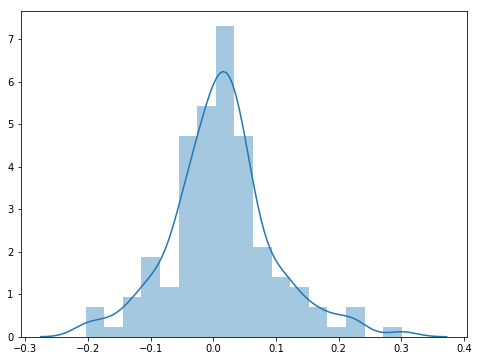

In [840]:
plt.figure(figsize=(8, 6))
sns.distplot(price_train_data-price_train_predicted_data)
plt.show()

### Predicting using model:

In [841]:
_rfe_columns

['enginesize', 'rotor', 'hatchback', 'bmw', 'porsche', 'idi']

In [842]:
x_train_rfe = sm.add_constant(car_prices_train[_rfe_columns])
final_model = sm.OLS(price_train_data, x_train_rfe).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sat, 25 May 2019   Prob (F-statistic):           9.06e-55
Time:                        18:29:33   Log-Likelihood:                 155.66
No. Observations:                 143   AIC:                            -297.3
Df Residuals:                     136   BIC:                            -276.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0653      0.016     -4.189      0.0

In [843]:
car_prices_test[_scaling_columns] = minmax_scaler.transform(car_prices_test[_scaling_columns])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [844]:
car_prices_test.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,volvo,vw,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,0.4,1.0,0.313793,0.409756,64.4,0.460177,0.235066,0.2,0.139623,0.404762,...,0,0,1,1,0,0,0,0,0,0
186,0.8,1.0,0.368966,0.497561,65.5,0.699115,0.305275,0.2,0.181132,0.404762,...,0,0,1,0,0,0,0,1,0,0
59,0.6,0.0,0.420690,0.596748,66.5,0.522124,0.347944,0.2,0.230189,0.563492,...,0,0,1,1,0,0,0,0,0,0
165,0.6,0.0,0.272414,0.448780,64.0,0.424779,0.301396,0.2,0.139623,0.444444,...,0,0,1,0,0,0,0,1,0,0
140,0.8,0.0,0.231034,0.263415,63.8,0.699115,0.291699,0.2,0.177358,0.746032,...,0,0,1,1,0,0,0,0,0,0


In [845]:
price_test_data = car_prices_test.pop('price')

In [846]:
x_test_rfe = sm.add_constant(car_prices_test[_rfe_columns])
price_test_predicted_data = final_model.predict(x_test_rfe)

In [847]:
x_test_rfe.shape

(62, 7)

In [848]:
price_test_predicted_data.head()

160    0.091064
186    0.137564
59     0.153715
165    0.091064
140    0.094533
dtype: float64

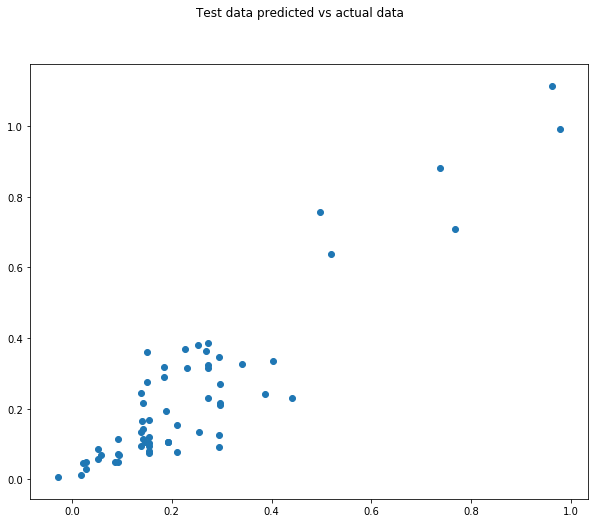

In [849]:
fig = plt.figure(figsize=(10,8))
plt.scatter(price_test_predicted_data, price_test_data)
plt.suptitle('Test data predicted vs actual data')
plt.show()

In [850]:
calculate_vfi(_rfe_columns, car_prices_train[_rfe_columns])

     Features   VIF
0  enginesize  1.60
2   hatchback  1.35
5         idi  1.16
3         bmw  1.14
1       rotor  1.10
4     porsche  1.08


## Conclusion: 